In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
# Step 1: Data Collection
ticker = "^GSPC"
data = yf.download(ticker, start="2000-01-01", end="2024-07-31")
data = data.reset_index()
df = data[['Date', 'Close']]


[*********************100%%**********************]  1 of 1 completed


In [ ]:
df

,Date,Close
0,2000-01-03,1455.219971
1,2000-01-04,1399.420044
2,2000-01-05,1402.109985
3,2000-01-06,1403.449951
4,2000-01-07,1441.469971
...,...,...
6177,2024-07-24,5427.129883
6178,2024-07-25,5399.220215
6179,2024-07-26,5459.100098
6180,2024-07-29,5463.540039


In [ ]:
# Check for missing values
missing_values = df.isna().sum()
print(f'Missing values: {missing_values}')


Missing values: Date     0
Close    0
dtype: int64


In [ ]:
# Log transformation
df['Close'] = np.log(df['Close'])

<ipython-input-37-81cbb1d2c96f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = np.log(df['Close'])


In [ ]:
msk = (df.index < len(df)-30)
df_train = df[msk].copy()
df_test = df[~msk].copy()

In [ ]:
# Fit the ARIMA model with known parameters (p=0, d=1, q=1)
model = ARIMA(df_train['Close'], order=(0, 1, 1))
model_fit = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Forecasting for the next 30 days
forecast_test_auto = model_fit.forecast(steps=len(df_test))

In [ ]:

df['Forecast'] = np.nan
df.loc[df.index[-30:], 'Forecast'] = forecast_test_auto.values

<ipython-input-41-99389705c3ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan


In [ ]:
# Filter the last 120 days for plotting
df_last_120 = df.iloc[-251:].copy()

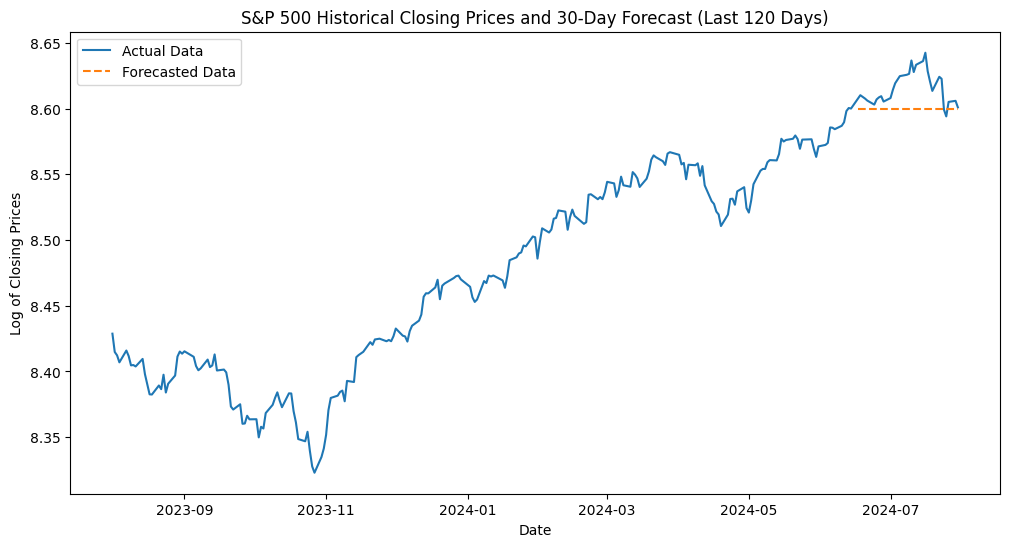

In [ ]:
# Plotting the actual and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df_last_120['Date'], df_last_120['Close'], label='Actual Data')
plt.plot(df_last_120['Date'], df_last_120['Forecast'], label='Forecasted Data', linestyle='--')
plt.title('S&P 500 Historical Closing Prices and 30-Day Forecast (Last 120 Days)')
plt.xlabel('Date')
plt.ylabel('Log of Closing Prices')
plt.legend()
plt.show()